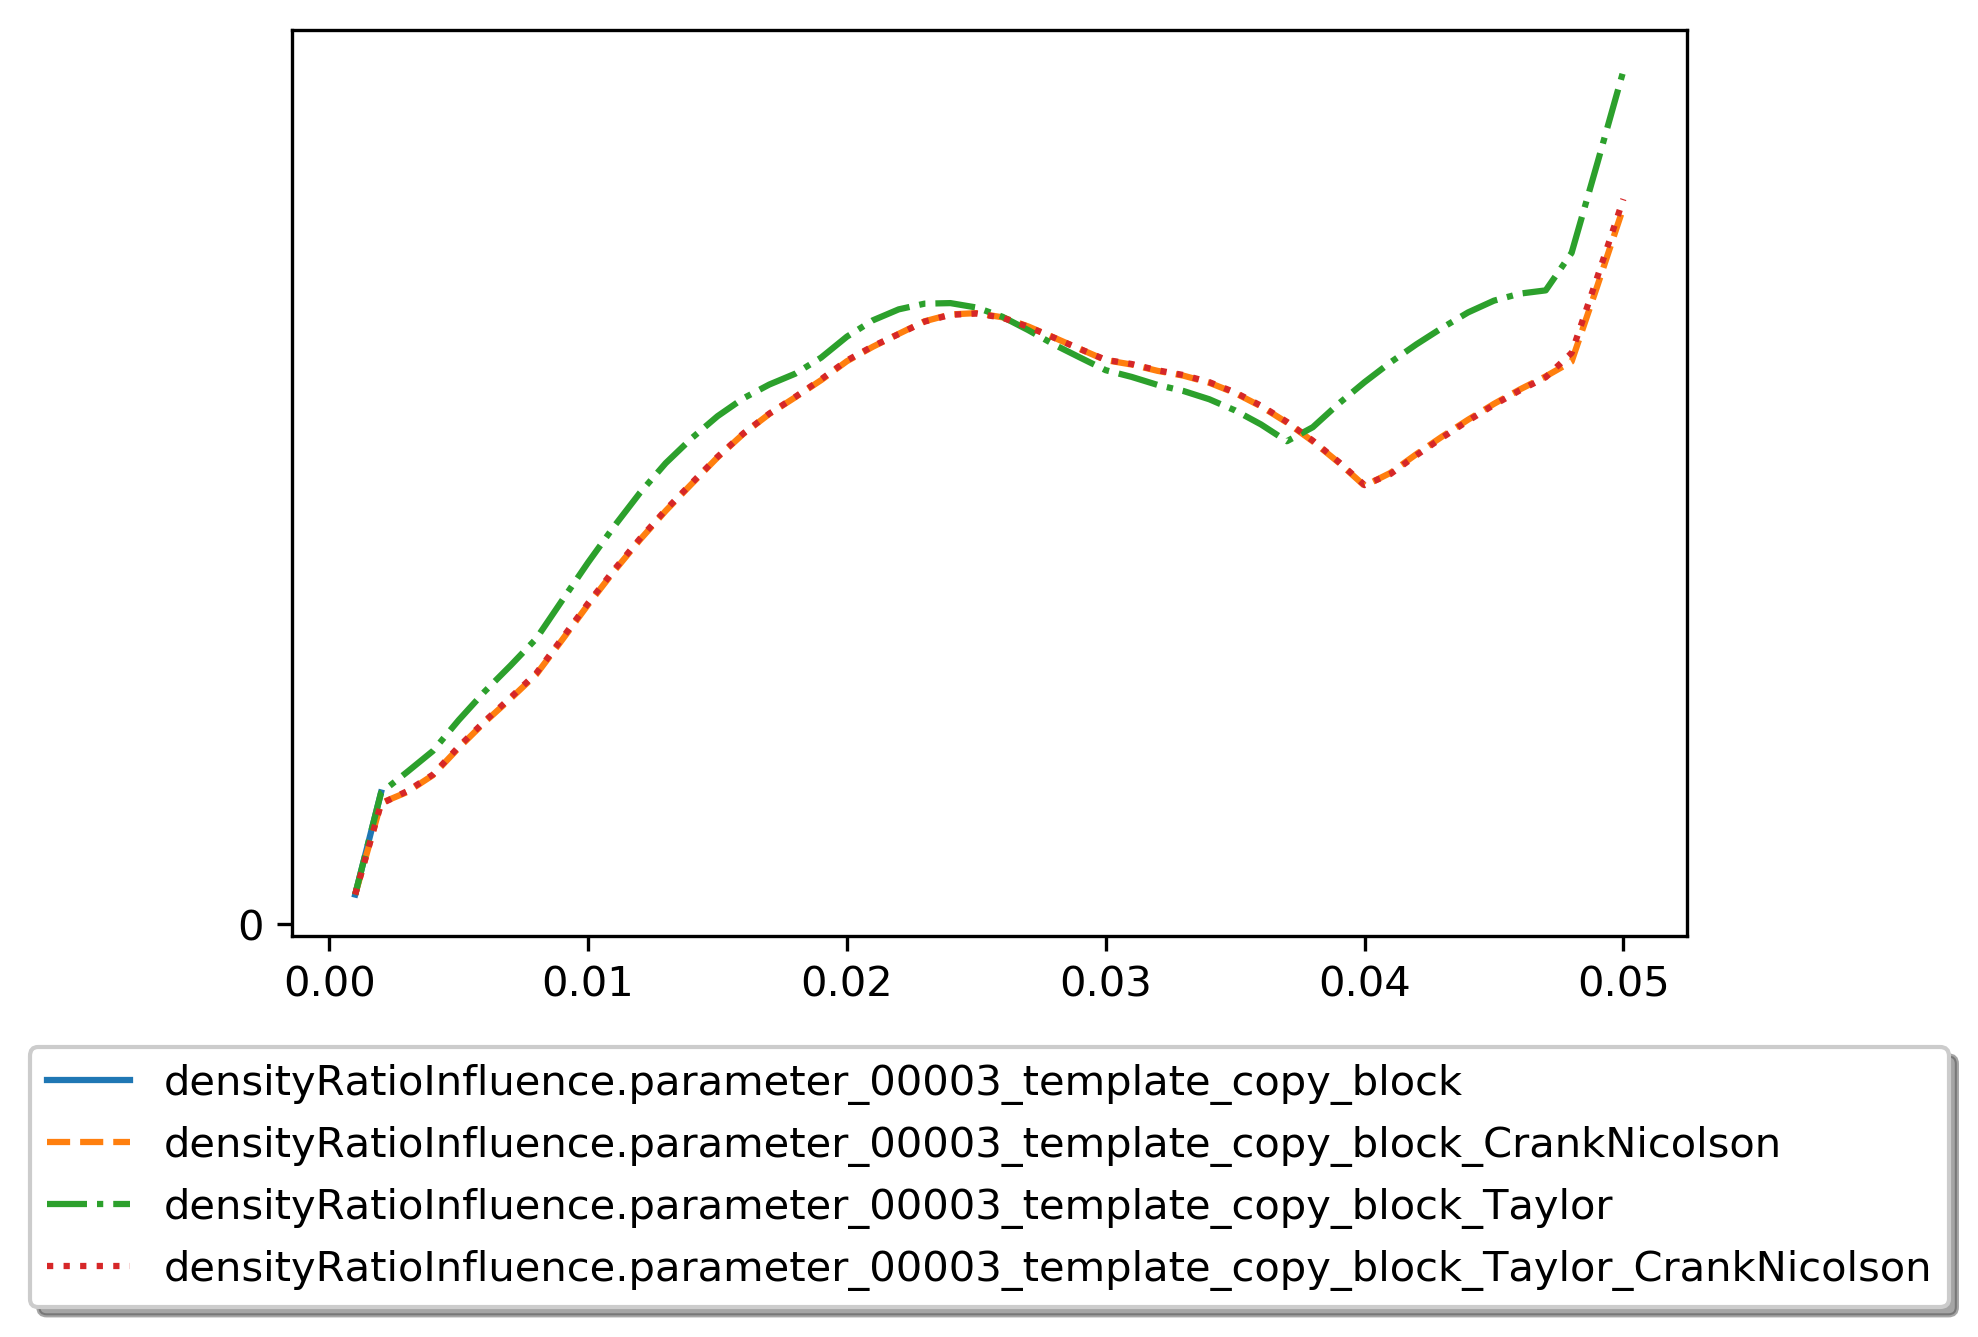

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import PyFoam #TODO: plot density ratio on the diagram legend, not the variation
from matplotlib import lines
lStyles = list(lines.lineStyles.keys())

#rcParams['text.usetex'] = True
rcParams['figure.dpi'] = 300

studyName = "densityRatioInfluence.parameter_00"

studyDirs = [directory for directory in os.listdir(os.curdir) \
             if os.path.isdir(directory) and studyName in directory] 

studyDirs.sort()

studyFileName = "stationaryDropletResults.csv"
studyFilePaths = [(i, os.path.join(studyDir, studyFileName)) for i,studyDir in enumerate(studyDirs) \
                  if os.path.exists(os.path.join(studyDir,studyFileName))]

studyDframeTuples = [(i, pd.read_csv(studyFilePath)) for i,studyFilePath in studyFilePaths]

fig, ax = plt.subplots()
ax.set_yscale('symlog')

# TODO: BUG, lines should not be the same
for i,studyDframeTuple in enumerate(studyDframeTuples):
    ax.plot(studyDframeTuple[1]['time'], studyDframeTuple[1]['Linf velocity error'], 
            ls=lStyles[i], label=studyDirs[studyDframeTuple[0]]) 

    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=1)
plt.show()